# TV Series Rating Prediction

## Introduction
The objective of this project is to predict movie ratings based on various features such as genre, duration, and certificate. The dataset contains information about movies, and we aim to build a regression model to predict the ratings. We will go through several steps including data collection, preprocessing, exploratory data analysis, feature engineering, model selection, and evaluation.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import joblib
import re #regular expression

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Data Collection and Preprocessing

First, we load the dataset and perform basic preprocessing steps, such as handling missing values, transforming data types, and encoding categorical variables.

In [42]:
df = pd.read_csv(r"C:\Users\Seun\Desktop\jupiter_nb\new_project\IMDb_TV_Series_Analysis_and_Rating_Prediction\imdb.csv")
df.head()

,lister-item-index,lister-item-header,certificate,runtime,genre,rating,votes
0,1.0,Stranger Things,15,60 min,"Drama, Fantasy, Horror",8.7,"1,327,188"
1,2.0,13 Reasons Why,18,60 min,"Drama, Mystery, Thriller",7.5,"314,321"
2,3.0,Orange Is the New Black,18,59 min,"Comedy, Crime, Drama",8.0,"319,342"
3,4.0,Black Mirror,18,60 min,"Drama, Mystery, Sci-Fi",8.7,"636,319"
4,5.0,Money Heist,15,60 min,"Action, Crime, Drama",8.2,"529,086"


In [43]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lister-item-index   80 non-null     float64
 1   lister-item-header  80 non-null     object 
 2   certificate         80 non-null     object 
 3   runtime             80 non-null     object 
 4   genre               80 non-null     object 
 5   rating              80 non-null     float64
 6   votes               80 non-null     object 
dtypes: float64(2), object(5)
memory usage: 4.5+ KB


,lister-item-index,rating
count,80.0000,80.00000
mean,40.5000,7.72000
std,23.2379,0.71235
min,1.0000,5.90000
25%,20.7500,7.20000
50%,40.5000,7.80000
75%,60.2500,8.22500
max,80.0000,8.80000


In [44]:
# check for missing values 
print(df.isnull().sum())

lister-item-index     0
lister-item-header    0
certificate           0
runtime               0
genre                 0
rating                0
votes                 0
dtype: int64


# Data cleaning steps

In [45]:
# correct data type
#change pg in certificate column to float
txt_num={'PG': 1}
df['certificate']=df['certificate'].replace(txt_num)
df['votes'] = df['votes'].str.replace(',', '').astype(float)
df[['certificate', 'votes']] = df[['certificate', 'votes']].astype(float)

In [46]:
#use regular expression to extract the numeric part
df['Runtime'] = df['runtime'].str.extract(r'(\d+)').astype(float)

In [47]:
df.drop('runtime', axis=1, inplace=True)

In [48]:
df.drop('lister-item-index', axis=1)

,lister-item-header,certificate,genre,rating,votes,Runtime
0,Stranger Things,15.0,"Drama, Fantasy, Horror",8.7,1327188.0,60.0
1,13 Reasons Why,18.0,"Drama, Mystery, Thriller",7.5,314321.0,60.0
2,Orange Is the New Black,18.0,"Comedy, Crime, Drama",8.0,319342.0,59.0
3,Black Mirror,18.0,"Drama, Mystery, Sci-Fi",8.7,636319.0,60.0
4,Money Heist,15.0,"Action, Crime, Drama",8.2,529086.0,60.0
...,...,...,...,...,...,...
75,F Is for Family,15.0,"Animation, Comedy, Drama",8.0,41074.0,30.0
76,The Ranch,15.0,"Comedy, Drama, Western",7.5,42401.0,30.0
77,American Vandal,15.0,"Comedy, Crime, Drama",8.1,32985.0,34.0
78,Dead to Me,15.0,"Comedy, Crime, Drama",7.9,99440.0,30.0


In [49]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lister-item-index   80 non-null     float64
 1   lister-item-header  80 non-null     object 
 2   certificate         80 non-null     float64
 3   genre               80 non-null     object 
 4   rating              80 non-null     float64
 5   votes               80 non-null     float64
 6   Runtime             80 non-null     float64
dtypes: float64(5), object(2)
memory usage: 4.5+ KB


## Exploratory Data Analysis (EDA)
In this section, we explore the dataset to uncover patterns and insights.

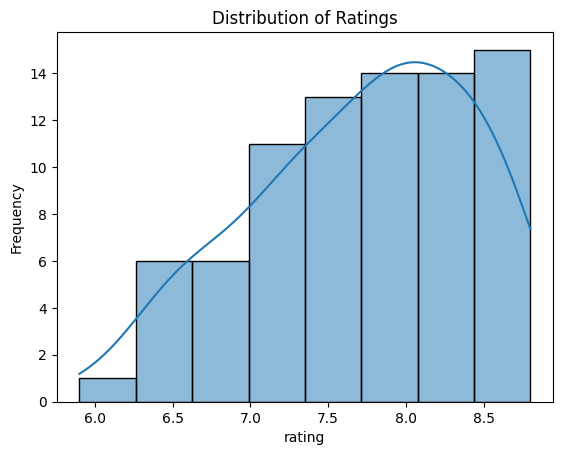

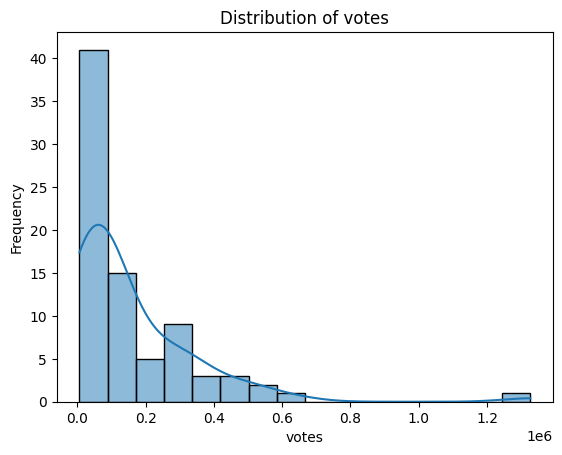

In [50]:
#distribution of rating and votes
sns.histplot(df['rating'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df['votes'], kde=True)
plt.title('Distribution of votes')
plt.xlabel('votes')
plt.ylabel('Frequency')
plt.show()

                   lister-item-index  certificate    rating     votes  \
lister-item-index           1.000000    -0.091889 -0.275975 -0.616414   
certificate                -0.091889     1.000000  0.246714  0.195341   
rating                     -0.275975     0.246714  1.000000  0.547499   
votes                      -0.616414     0.195341  0.547499  1.000000   
Runtime                    -0.021890     0.058246  0.056595  0.032681   

                    Runtime  
lister-item-index -0.021890  
certificate        0.058246  
rating             0.056595  
votes              0.032681  
Runtime            1.000000  


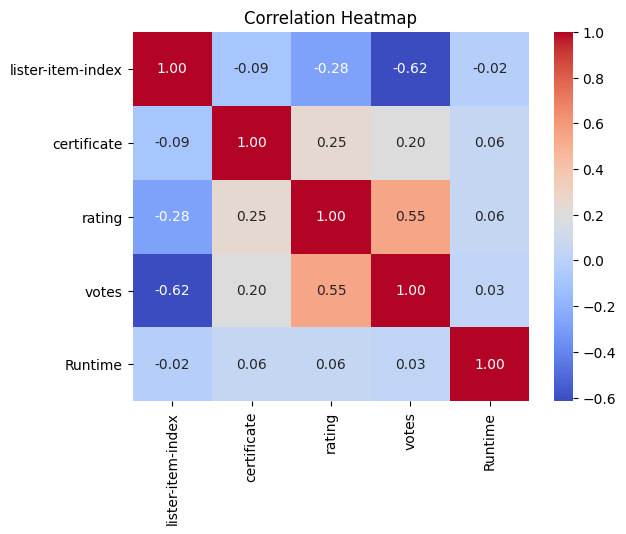

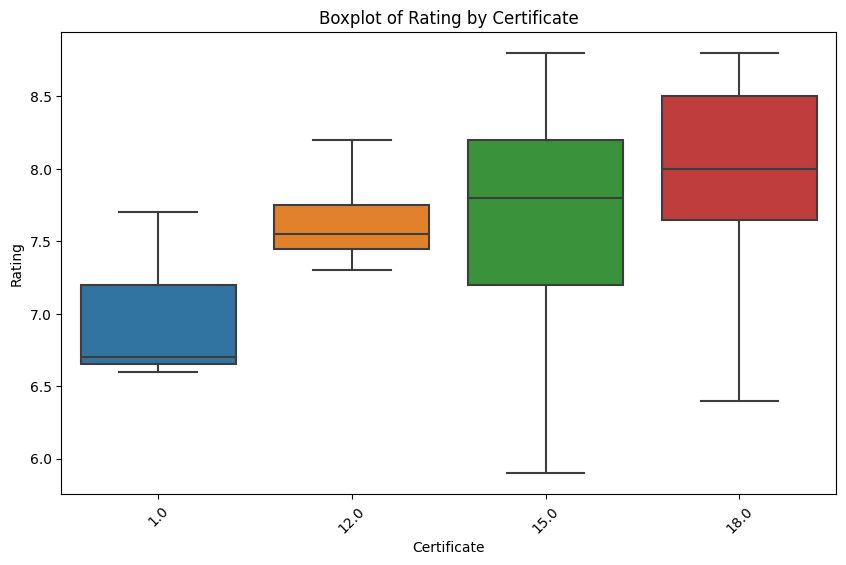

In [51]:
# correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# boxplot of rating by certificate
plt.figure(figsize=(10, 6))
sns.boxplot(x='certificate', y='rating', data=df)
plt.title('Boxplot of Rating by Certificate')
plt.xlabel('Certificate')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

In [52]:
# Split the 'genre' column into separate columns
genre_split = df['genre'].str.split(',', expand=True)
genre_split.columns = ['genre_1', 'genre_2', 'genre_3']

# Concatenate the split genres with the original DataFrame
df = pd.concat([df, genre_split], axis=1)

# Drop the original 'genre' column
df.drop('genre', axis=1, inplace=True)

# Reshape the DataFrame to have a single genre column
df_melted = df.melt(id_vars=['lister-item-header', 'certificate', 'Runtime', 'rating', 'votes'],
                    value_vars=['genre_1', 'genre_2', 'genre_3'],
                    var_name='genre_num', value_name='genre')

# Drop rows with missing values in the 'genre' column
df_cleaned = df_melted.dropna(subset=['genre'])

# Now 'df_cleaned' contains all genres in a single column

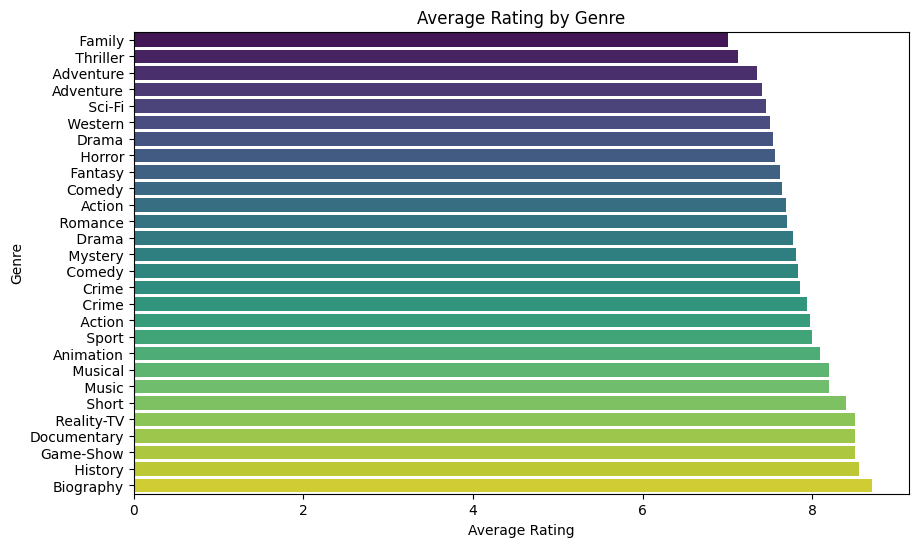

In [53]:
# Group by the 'genre' column and calculate the mean rating for each genre
average_rating_by_genre = df_cleaned.groupby('genre')['rating'].mean().reset_index()

# Rename the columns for clarity
average_rating_by_genre.columns = ['Genre', 'Average_Rating']

# Sort the DataFrame by 'Average_Rating' in ascending order
average_rating_by_genre = average_rating_by_genre.sort_values(by='Average_Rating', ascending=True)

# Display the result
plt.figure(figsize=(10, 6))
sns.barplot(x='Average_Rating', y='Genre', data=average_rating_by_genre, palette='viridis')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()
#print(average_rating_by_genre)

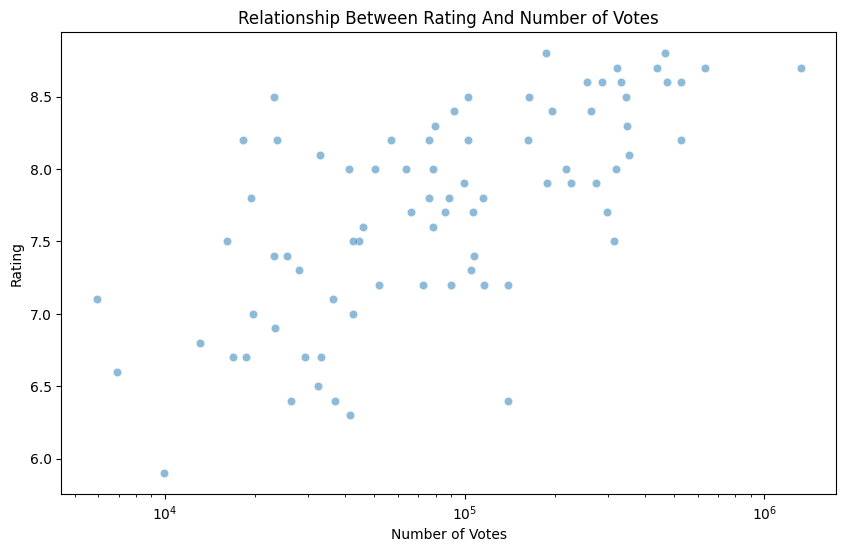

In [54]:
# relationship between rating and number of votes 
plt.figure(figsize=(10,6))
sns.scatterplot(x='votes', y='rating', data=df, alpha=0.5)
plt.title('Relationship Between Rating And Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()

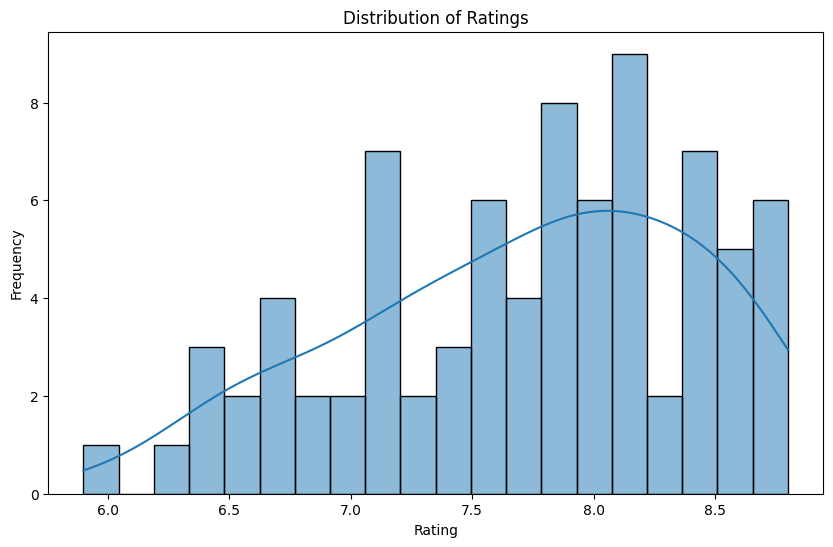

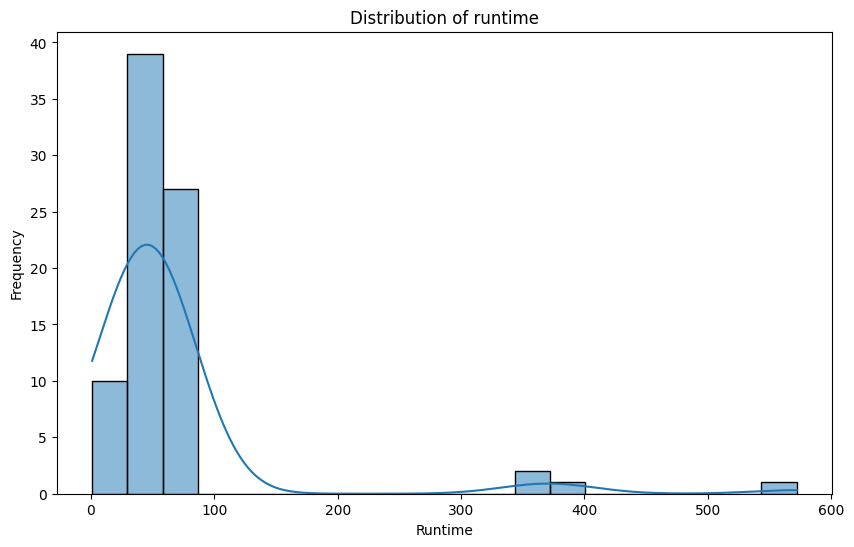

In [55]:
#distribution rating
plt.figure(figsize=(10,6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['Runtime'], bins=20, kde=True)
plt.title('Distribution of runtime')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.show()

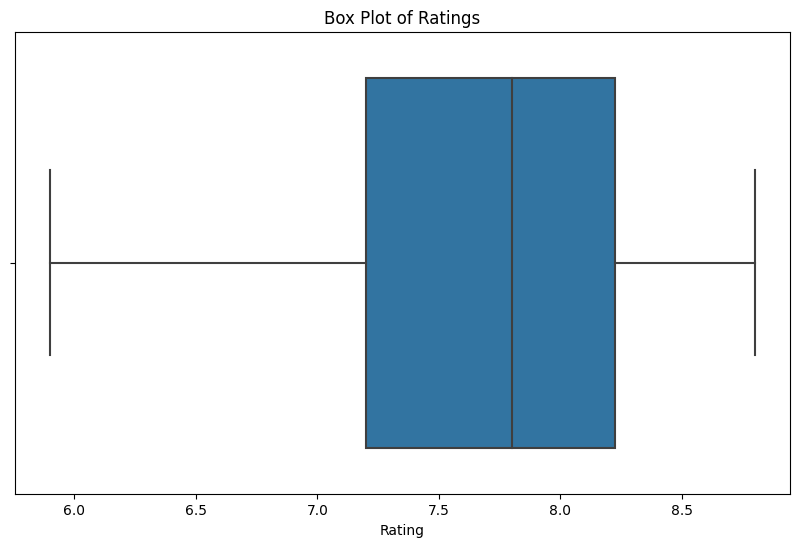

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['rating'])
plt.title('Box Plot of Ratings')
plt.xlabel('Rating')
plt.show()

In [57]:
#rating and votes correlation 
correlation = df['rating'].corr(df['votes'])
print(f"Correlation between rating and votes : {correlation}")

Correlation between rating and votes : 0.5474993358841764


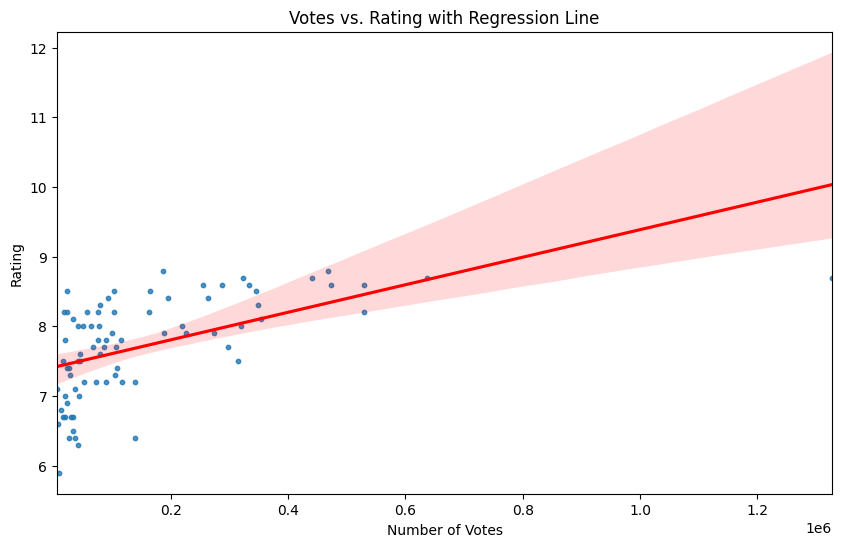

In [58]:
plt.figure(figsize=(10, 6))
sns.regplot(x='votes', y='rating', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Votes vs. Rating with Regression Line')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.show()

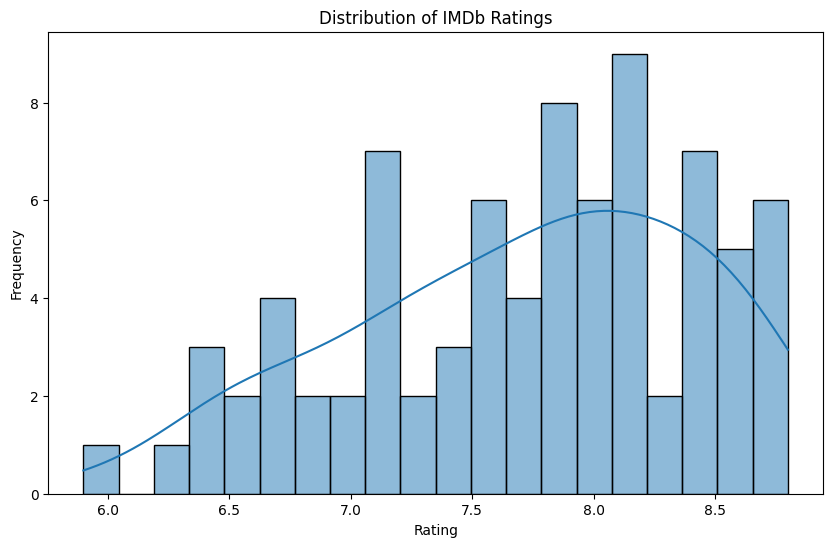

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


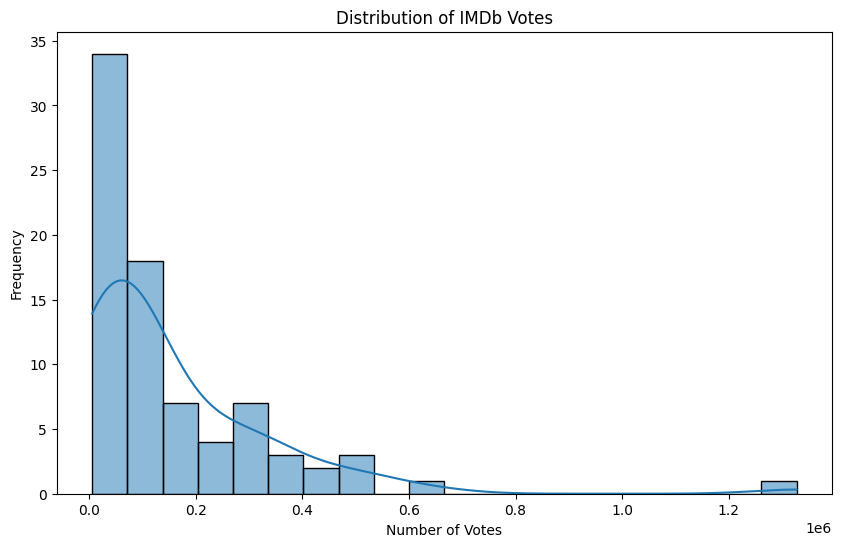

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(df['votes'], bins=20, kde=True)
plt.title('Distribution of IMDb Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()


In [61]:
print(df.columns)

Index(['lister-item-index', 'lister-item-header', 'certificate', 'rating',
       'votes', 'Runtime', 'genre_1', 'genre_2', 'genre_3'],
      dtype='object')


In [62]:
# Combine the genre columns into a single column
df['all_genres'] = df[['genre_1', 'genre_2', 'genre_3']].apply(lambda x: ','.join(x.dropna()), axis=1)

# Split the combined genres into a list
df['all_genres'] = df['all_genres'].str.split(',')

# Explode the list to separate each genre into its own row
df_exploded = df.explode('all_genres')

# Rename the column for clarity
df_exploded.rename(columns={'all_genres': 'genre'}, inplace=True)
df.head()

,lister-item-index,lister-item-header,certificate,rating,votes,Runtime,genre_1,genre_2,genre_3,all_genres
0,1.0,Stranger Things,15.0,8.7,1327188.0,60.0,Drama,Fantasy,Horror,"[Drama, Fantasy, Horror]"
1,2.0,13 Reasons Why,18.0,7.5,314321.0,60.0,Drama,Mystery,Thriller,"[Drama, Mystery, Thriller]"
2,3.0,Orange Is the New Black,18.0,8.0,319342.0,59.0,Comedy,Crime,Drama,"[Comedy, Crime, Drama]"
3,4.0,Black Mirror,18.0,8.7,636319.0,60.0,Drama,Mystery,Sci-Fi,"[Drama, Mystery, Sci-Fi]"
4,5.0,Money Heist,15.0,8.2,529086.0,60.0,Action,Crime,Drama,"[Action, Crime, Drama]"


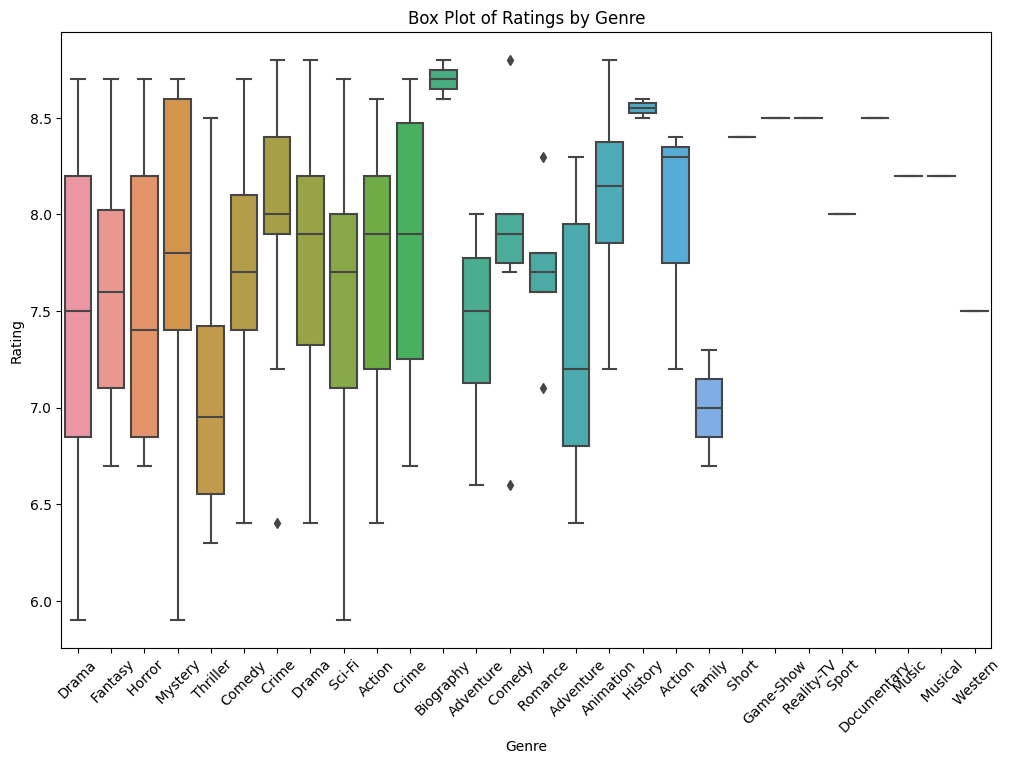

In [63]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='rating', data=df_exploded)
plt.title('Box Plot of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

# Data Clenaing 

In [64]:
# Fill missing values in genre2 with corresponding values from genre1
df['genre_2'].fillna(df['genre_1'], inplace=True)

# Fill missing values in genre3 with corresponding values from genre2
df['genre_3'].fillna(df['genre_2'], inplace=True)

missing_values = df[['Runtime', 'genre_1', 'genre_2', 'genre_3', 'votes', 'certificate']].isnull().sum()
print("Missing Values:\n", missing_values)

df.head()
print(df.dtypes)

Missing Values:
 Runtime        0
genre_1        0
genre_2        0
genre_3        0
votes          0
certificate    0
dtype: int64
lister-item-index     float64
lister-item-header     object
certificate           float64
rating                float64
votes                 float64
Runtime               float64
genre_1                object
genre_2                object
genre_3                object
all_genres             object
dtype: object


In [65]:
# Convert 'certificate' column to categorical data type
df['certificate'] = df['certificate'].astype('category')

# Now, we can proceed with one-hot encoding and other preprocessing steps as before
df = pd.get_dummies(df, columns=['genre_1', 'genre_2', 'genre_3', 'certificate'], drop_first=True)
df.head()

,lister-item-index,lister-item-header,rating,votes,Runtime,all_genres,genre_1_Adventure,genre_1_Animation,genre_1_Biography,genre_1_Comedy,...,genre_3_ Romance,genre_3_ Sci-Fi,genre_3_ Sport,genre_3_ Thriller,genre_3_ Western,genre_3_Comedy,genre_3_Drama,certificate_12.0,certificate_15.0,certificate_18.0
0,1.0,Stranger Things,8.7,1327188.0,60.0,"[Drama, Fantasy, Horror]",0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2.0,13 Reasons Why,7.5,314321.0,60.0,"[Drama, Mystery, Thriller]",0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,3.0,Orange Is the New Black,8.0,319342.0,59.0,"[Comedy, Crime, Drama]",0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4.0,Black Mirror,8.7,636319.0,60.0,"[Drama, Mystery, Sci-Fi]",0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,5.0,Money Heist,8.2,529086.0,60.0,"[Action, Crime, Drama]",0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Feature Engineering

We create new features and transform existing ones to better suit our model.

In [66]:
# split data into features(x) and target variables(y)

X= df.drop(columns=['lister-item-header', 'rating','all_genres'])
y= df['rating']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Selection and Tuning

We use a pipeline to streamline the process of model selection and hyperparameter tuning

## Model Evaluation

We evaluate the model using various performance metrics.


In [67]:
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# instantiate the linear regression model
#model = LinearRegression()

#train the model
#model.fit(X_train, y_train)

# predict on test data
#y_pred =model.predict(X_test)

#evaluate model performance
#mse= mean_squared_error(y_test, y_pred)
#mae= mean_absolute_error(y_test, y_pred)
#rmse= np.sqrt(mse)
#r2= r2_score(y_test,y_pred)

#print("Mean Squared Error (MSE):", mse)
#print("Mean Absolute Error (MAE):", mae)
#print("Root Mean Squared Error (RMSE):", rmse)
#print("R-squared (R2):", r2)

In [68]:
# Define the models to test
models = [
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet())
]

# Set up a dictionary to store the best model and its performance
best_model = None
best_score = float('inf')
best_params = None

for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    
    # Define the hyperparameters for GridSearchCV for each model
    if name == 'LinearRegression':
        param_grid = {
            'regressor__fit_intercept': [True, False]
        }
    elif name == 'Ridge' or name == 'Lasso' or name == 'ElasticNet':
        param_grid = {
            'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
        }
    
    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    
    # Fit the model to the training data
    grid_search.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = grid_search.predict(X_test)
    
    # Evaluate the model performance
    mse = mean_squared_error(y_test, y_pred)
    
    if mse < best_score:
        best_score = mse
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

# Print the best model and its parameters
print("Best model:", best_model)
print("Best hyperparameters:", best_params)

# Predict on the test data with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Best model: Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', Ridge(alpha=100.0))])
Best hyperparameters: {'regressor__alpha': 100.0}
Mean Squared Error (MSE): 0.3773043370224568
Mean Absolute Error (MAE): 0.5012527161477067
Root Mean Squared Error (RMSE): 0.6142510374614412
R-squared (R2): 0.36033172001490743


## Feature Importance

We analyze the importance of each feature in the model.

In [69]:
# Get coefficients from best model 
ridge_model = best_model.named_steps['regressor']
coefficients = ridge_model.coef_
feature_names = X.columns

#create a dataframe doe better visualization 
coef_df = pd.DataFrame({'Feature':feature_names, 'coefficient': coefficients})
print(coef_df.sort_values(by='coefficient', ascending=False))


                Feature  coefficient
1                 votes     0.136749
32     genre_3_ History     0.046074
5     genre_1_Biography     0.039618
16      genre_2_ Horror     0.034719
22       genre_2_ Short     0.027739
4     genre_1_Animation     0.026885
13       genre_2_ Crime     0.025729
10    genre_1_Game-Show     0.025673
36  genre_3_ Reality-TV     0.025673
19  genre_2_ Reality-TV     0.025673
17       genre_2_ Music     0.024992
34     genre_3_ Musical     0.024992
39       genre_3_ Sport     0.020973
45     certificate_15.0     0.018066
35     genre_3_ Mystery     0.017875
42       genre_3_Comedy     0.016848
24       genre_2_Comedy     0.016848
46     certificate_18.0     0.016089
29       genre_3_ Drama     0.013796
27      genre_3_ Comedy     0.008069
31     genre_3_ Fantasy     0.007065
2               Runtime     0.006996
7         genre_1_Crime     0.005612
26   genre_3_ Adventure     0.001697
14       genre_2_ Drama     0.001298
12      genre_2_ Comedy     0.001187
2

In [70]:
# perform cross validation 
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_model, X,y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
cv_rmse = np.sqrt(cv_mse)
print(f"Cross-Validated MSE: {cv_mse}")
print(f"Cross-Validated RMSE: {cv_rmse}")

Cross-Validated MSE: 0.4307848078942305
Cross-Validated RMSE: 0.6563419900434762


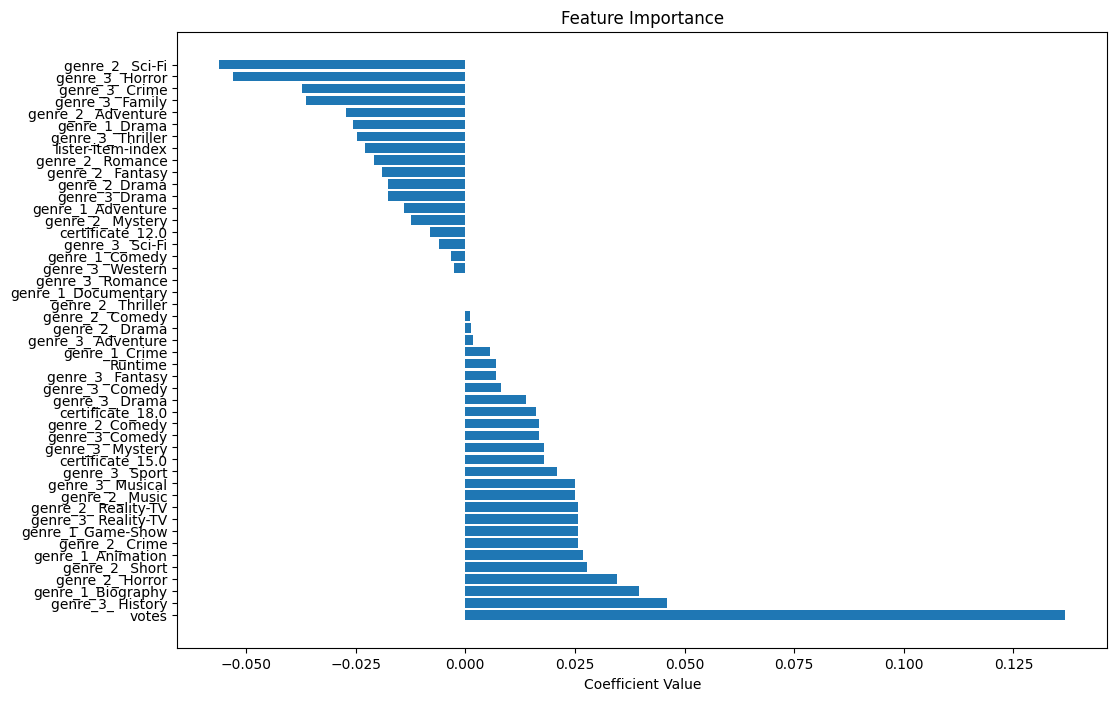

In [71]:
# Plotting feature importance

coef_df_sorted = coef_df.sort_values(by='coefficient', ascending=False)
plt.figure(figsize=(12, 8))
plt.barh(coef_df_sorted['Feature'], coef_df_sorted['coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()

In [72]:
# save model to a file 
joblib.dump(best_model, 'imdb_best_model.pk1')

# To load the model later
# loaded_model = joblib.load('best_model.pkl')

['imdb_best_model.pk1']

## Conclusion and Future Work

The model performed well with an R-squared value of 0.36, indicating that it explains 36% of the variance in the ratings. Future work could involve improving feature engineering and exploring more complex models to achieve better performance.